In [1]:
import numpy as np
import pandas as pd

from scipy.interpolate import make_interp_spline
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getCorrelations(data1, data2):
    
    cpearson, _ = pearsonr(np.asarray(data1), np.asarray(data2))
    cspearman, _ = spearmanr(np.asarray(data1), np.asarray(data2))

    print('Pearsons correlation value: %.3f' % cpearson)
    print('Spearman correlation value: %.3f' % cspearman)

    return 

## Marine flux and family dataset

In [3]:
marSed = pd.read_csv('data/biomarine_sflux.csv')

families = pd.read_csv('data/sepko_modern.dat',sep=' ',header=None)
families_time = -families[0].values
families_v = families[1].values

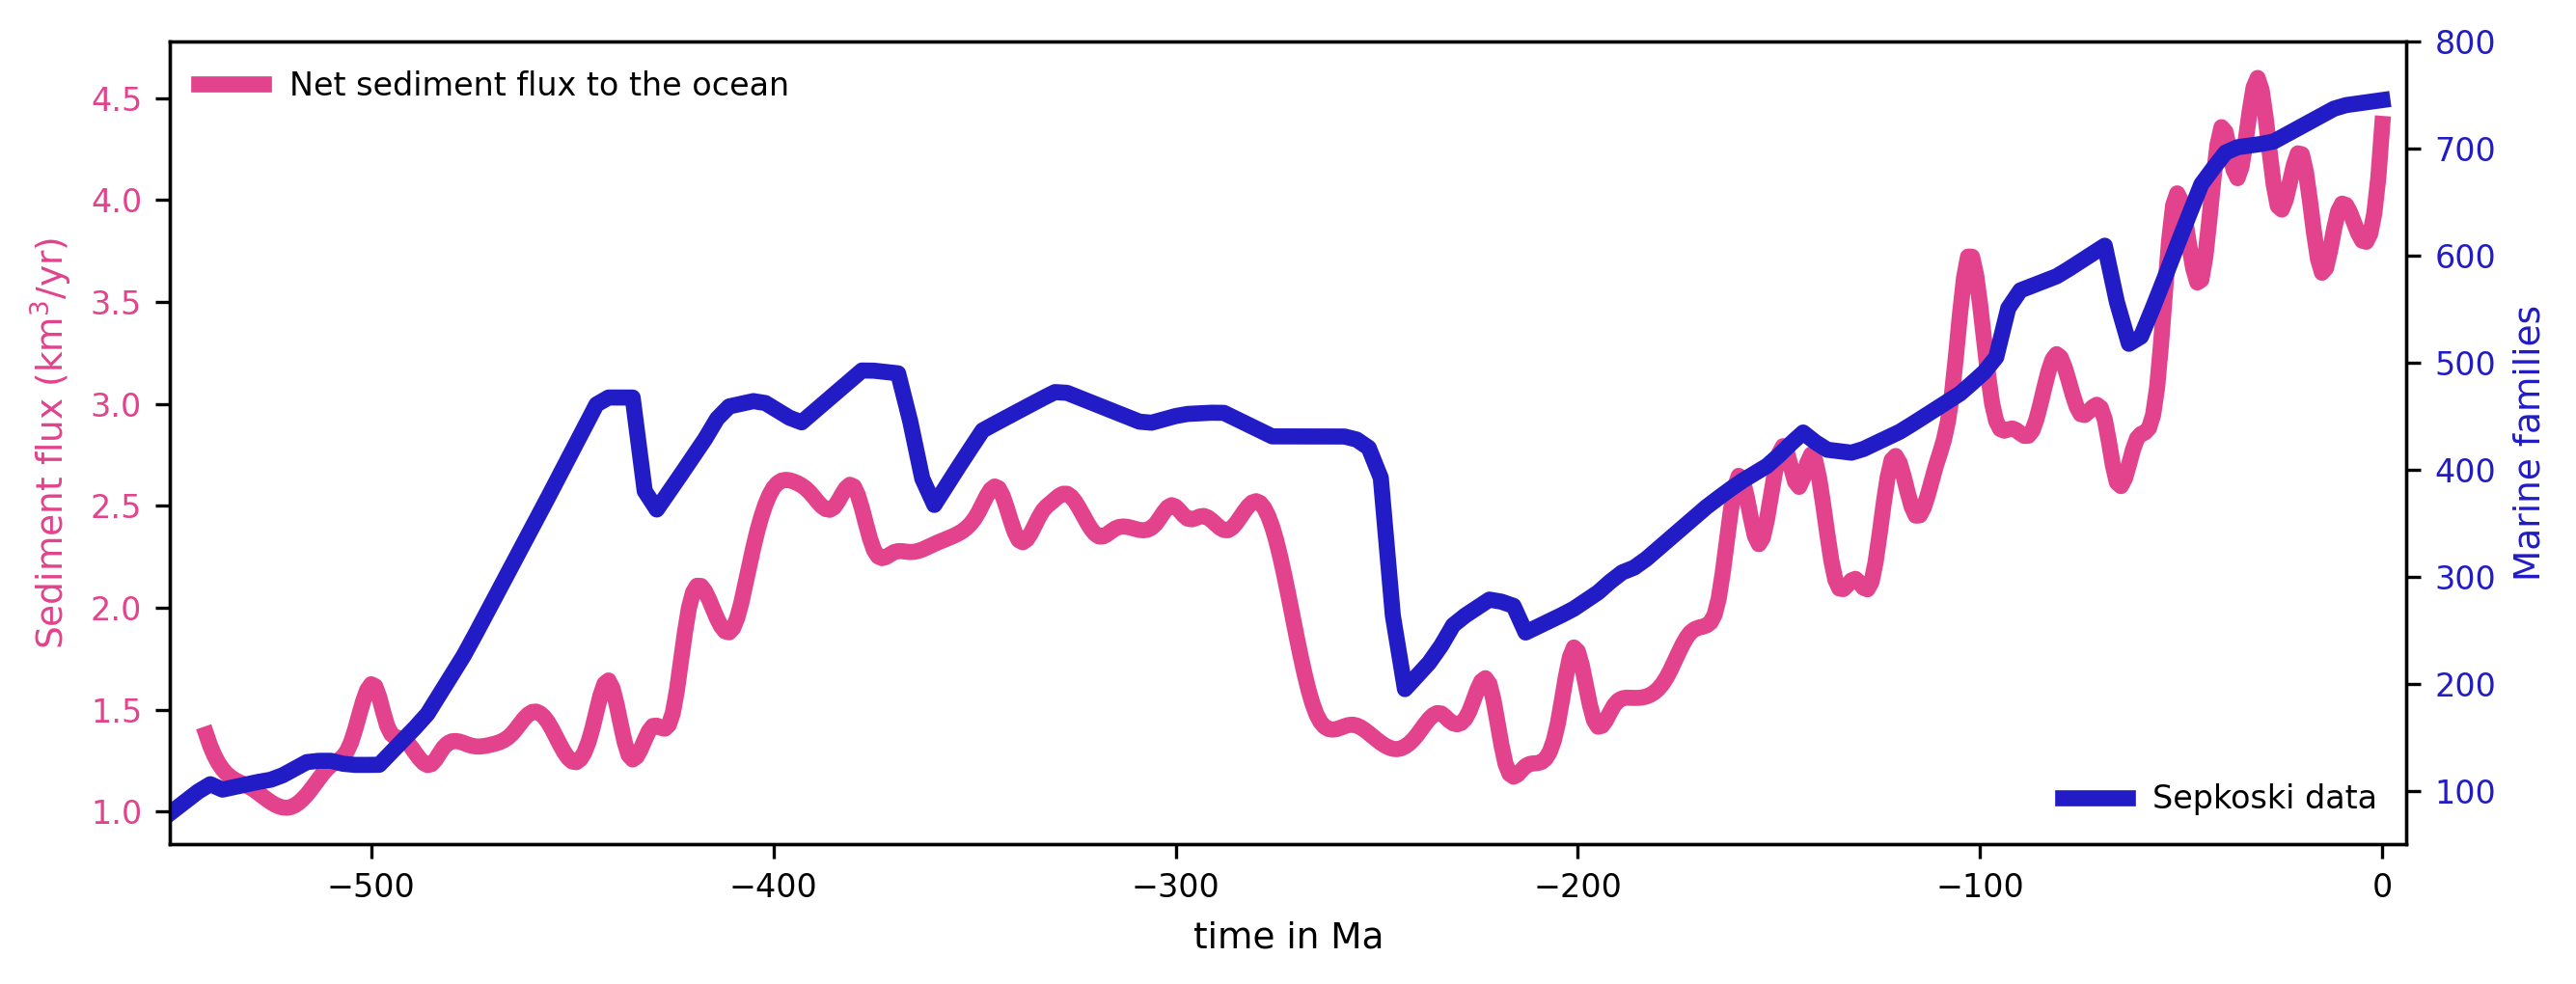

In [4]:
fig, ax1 = plt.subplots(figsize=(9, 3.5), dpi=300)

ax1.plot(marSed.sedft, marSed.sedfv, '-', color='#E2438C', zorder=2, lw=4, label='Net sediment flux to the ocean')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim([-550,6])
ax1.tick_params(axis='y', labelcolor='#E2438C')
ax1.set_ylabel('Sediment flux (km$^3$/yr)', fontsize=9, color='#E2438C')
plt.legend(frameon=False, prop={'size': 8}, loc=2)
plt.xlabel('time in Ma', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(families_time, families_v, '-', color='#221cc7', zorder=2, lw=4, label='Sepkoski data')
ax2.set_ylim(50,800)
ax2.tick_params(axis='y', labelcolor='#221cc7')
ax2.set_ylabel('Marine families', fontsize=9, color='#221cc7')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.legend(frameon=False, prop={'size': 8}, loc=4)
fig.tight_layout()
# plt.savefig('trend_sflux_marine.png',transparent=True,dpi=500)

plt.show()

In [5]:
# Dataset
flux_Spline = make_interp_spline(np.flip(marSed.sedft.values), np.flip(marSed.sedfv.values))
marine_Spline = make_interp_spline(np.flip(families_time), np.flip(families_v))
 
# Returns evenly spaced numbers over a specified interval.
time = np.linspace(-540, 0, 541)
flux = flux_Spline(time)
biomar = marine_Spline(time)

In [6]:
# Save interpolated dataset
data = {'time (Ma)': time,
        'sedFlux (km3/yr)': flux,
        'bioMar (Family Nb)': biomar,
       }
df = pd.DataFrame(data)
df.to_csv('sedflux_vs_marinebio.csv', index = False)

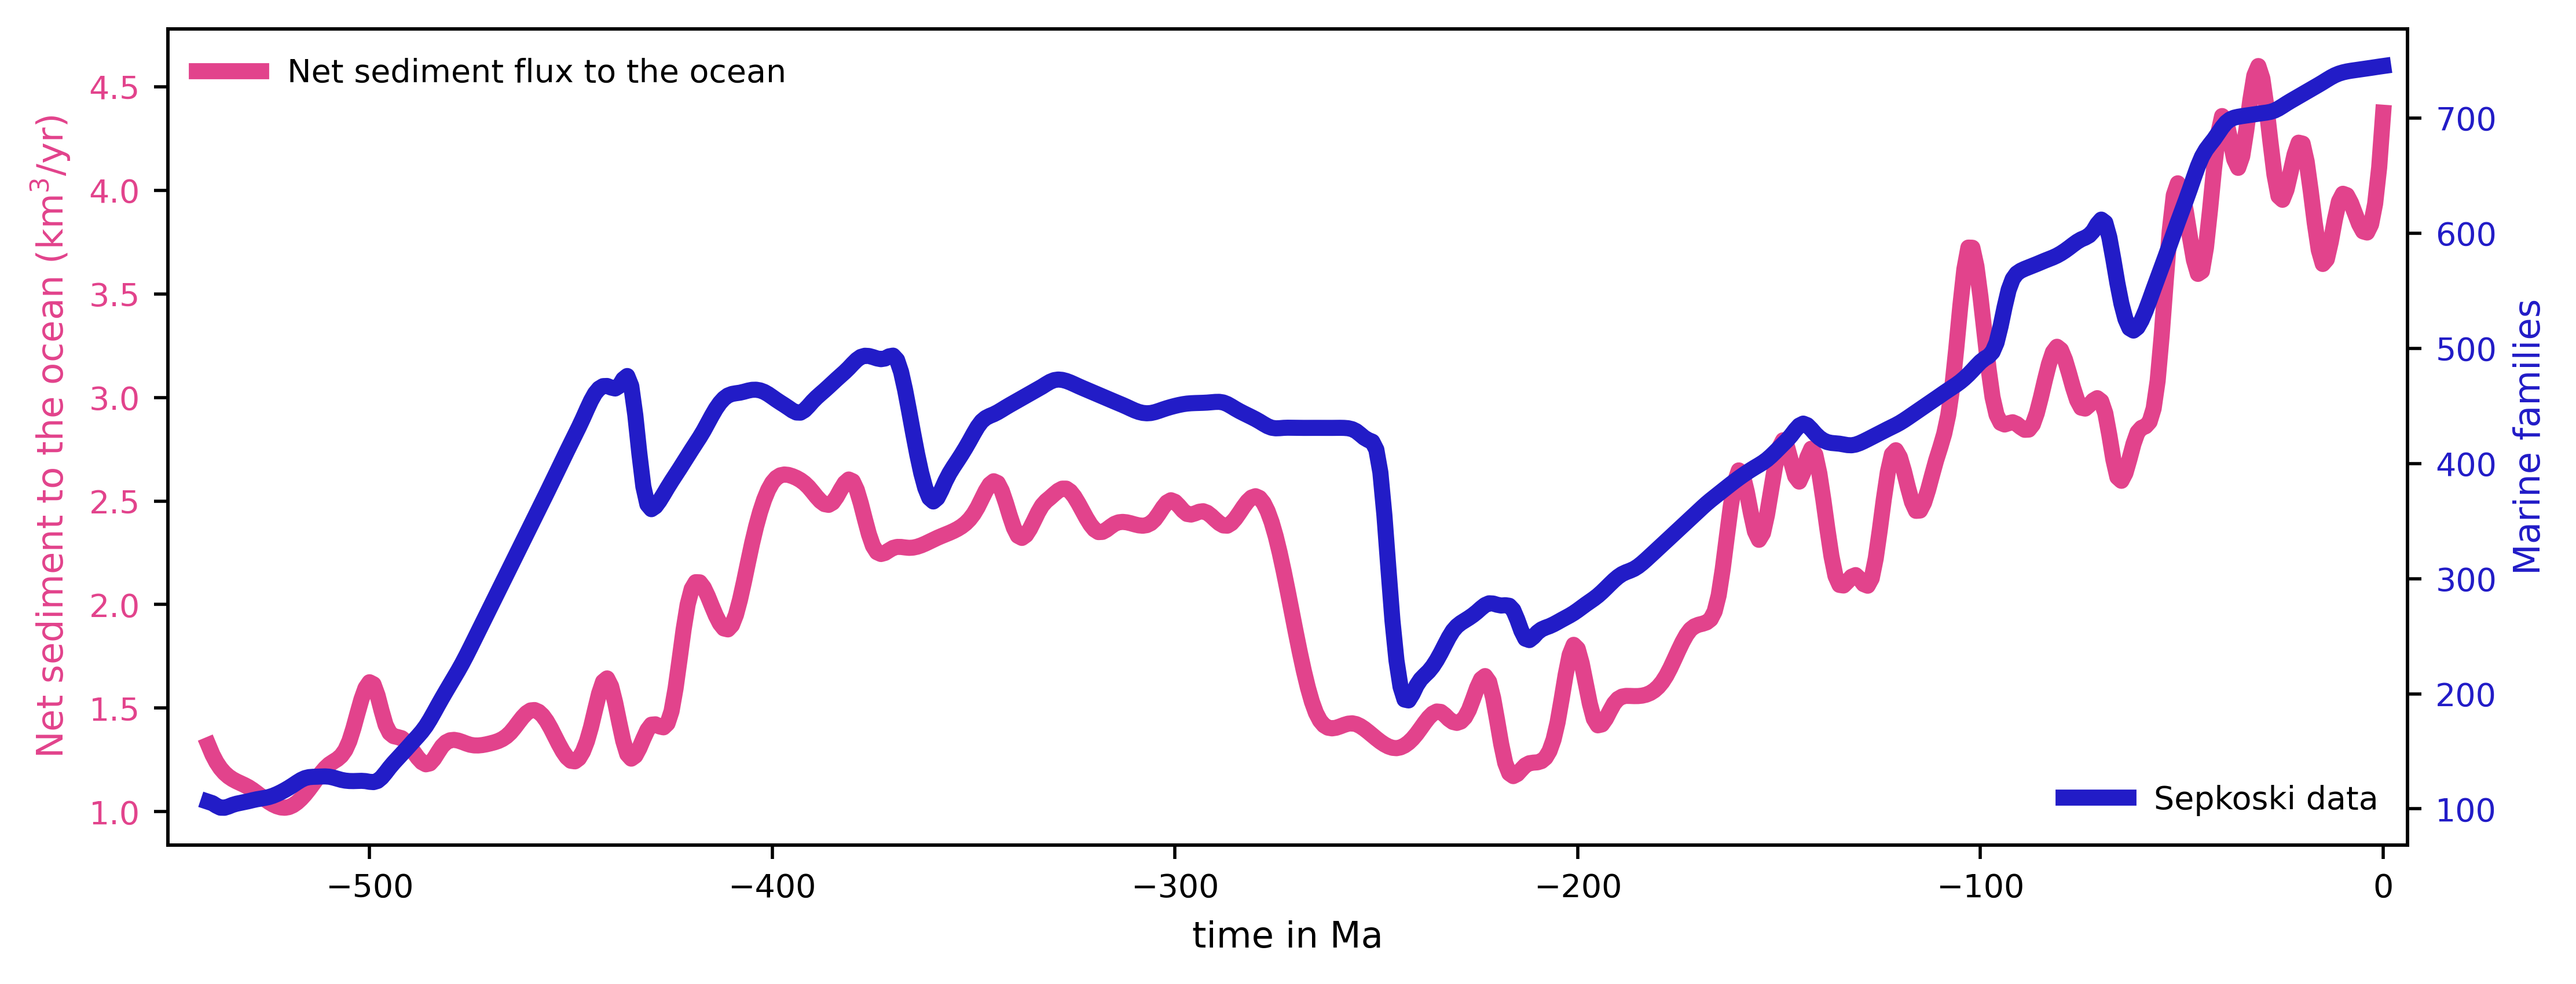

In [7]:
fig, ax1 = plt.subplots(figsize=(9, 3.5), dpi=500)

ax1.plot(time, flux, '-', color='#E2438C', zorder=2, lw=4, label='Net sediment flux to the ocean')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.tick_params(axis='y', labelcolor='#E2438C')
plt.ylabel('Net sediment to the ocean (km$^3$/yr)', fontsize=9, color='#E2438C')
plt.legend(frameon=False, prop={'size': 8}, loc=2)
plt.xlabel('time in Ma', fontsize=9)
plt.xlim([-550,6])

ax2 = ax1.twinx()
ax2.set_ylabel('Marine families', color='#221cc7', fontsize=9)
ax2.plot(time, biomar, color='#221cc7', lw=4, label='Sepkoski data', zorder=0)
ax2.tick_params(axis='y', labelcolor='#221cc7')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(frameon=False, prop={'size': 8}, loc=4)
fig.tight_layout()
plt.show()

In [8]:
getCorrelations(flux, biomar)

Pearsons correlation value: 0.876
Spearman correlation value: 0.853
